In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
#load data
data = pd.read_csv('/content/features_30_sec.csv')

In [ ]:
#split features and labels
X = data.drop(columns=['filename', 'label'])
y = data['label']

In [ ]:
#normalize/Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
# SVM (Support Vector Machine) Model
svm_model = SVC(kernel='linear')  # Creating an SVM model with a linear kernel
svm_model.fit(X_train, y_train)   # Training the SVM model on the training data
svm_predictions = svm_model.predict(X_test)  # Making predictions on the test data
svm_accuracy = accuracy_score(y_test, svm_predictions)  # Calculating accuracy using the true labels and predicted labels

# MLP (Multilayer Perceptron) Model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)  # Creating an MLP model with 2 hidden layers of 100 and 50 neurons
mlp_model.fit(X_train, y_train)  # Training the MLP model on the training data
mlp_predictions = mlp_model.predict(X_test)  # Making predictions on the test data
mlp_accuracy = accuracy_score(y_test, mlp_predictions)  # Calculating accuracy using the true labels and predicted labels

# Decision Tree Model
dt_model = DecisionTreeClassifier()  # Creating a Decision Tree model
dt_model.fit(X_train, y_train)  # Training the Decision Tree model on the training data
dt_predictions = dt_model.predict(X_test)  # Making predictions on the test data
dt_accuracy = accuracy_score(y_test, dt_predictions)  # Calculating accuracy using the true labels and predicted labels

# ANN (Artificial Neural Network) Model
ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)  # Creating an ANN model with 2 hidden layers of 100 and 50 neurons
ann_model.fit(X_train, y_train)  # Training the ANN model on the training data
ann_predictions = ann_model.predict(X_test)  # Making predictions on the test data
ann_accuracy = accuracy_score(y_test, ann_predictions)  # Calculating accuracy using the true labels and predicted labels


In [ ]:
# !pip install tensorflow

#CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Adjust output nodes based on the number of classes
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))



#evaluate CNN model
cnn_loss, cnn_accuracy = model.evaluate(X_test_cnn, y_test)



Epoch 1/10
25/25 [==============================] - 1s 17ms/step - loss: 1.6761 - accuracy: 0.3963 - val_loss: 1.4265 - val_accuracy: 0.4900
Epoch 2/10
25/25 [==============================] - 0s 9ms/step - loss: 1.1281 - accuracy: 0.6100 - val_loss: 1.2433 - val_accuracy: 0.5750
Epoch 3/10
25/25 [==============================] - 0s 11ms/step - loss: 0.9053 - accuracy: 0.6812 - val_loss: 1.2191 - val_accuracy: 0.5700
Epoch 4/10
25/25 [==============================] - 0s 9ms/step - loss: 0.7769 - accuracy: 0.7337 - val_loss: 1.1224 - val_accuracy: 0.5850
Epoch 5/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6920 - accuracy: 0.7700 - val_loss: 1.1300 - val_accuracy: 0.6150
Epoch 6/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6323 - accuracy: 0.7937 - val_loss: 1.1009 - val_accuracy: 0.6600
Epoch 7/10
25/25 [==============================] - 0s 10ms/step - loss: 0.5905 - accuracy: 0.8062 - val_loss: 1.1353 - val_accuracy: 0.6150
Epoch 8/10
25/25 

In [ ]:
#compare accuracies
print(f"SVM Accuracy: {svm_accuracy}")
print(f"MLP Accuracy: {mlp_accuracy}")
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"ANN Accuracy: {ann_accuracy}")
print(f"CNN Accuracy: {cnn_accuracy}")

SVM Accuracy: 0.685
MLP Accuracy: 0.715
Decision Tree Accuracy: 0.585
ANN Accuracy: 0.74
CNN Accuracy: 0.6700000166893005


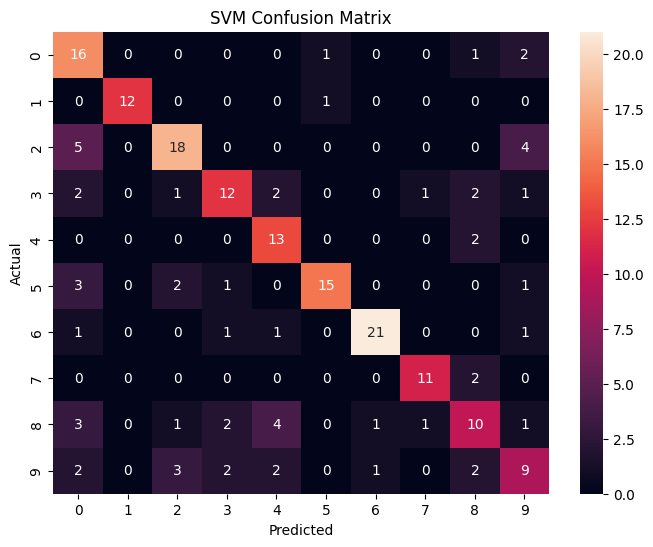

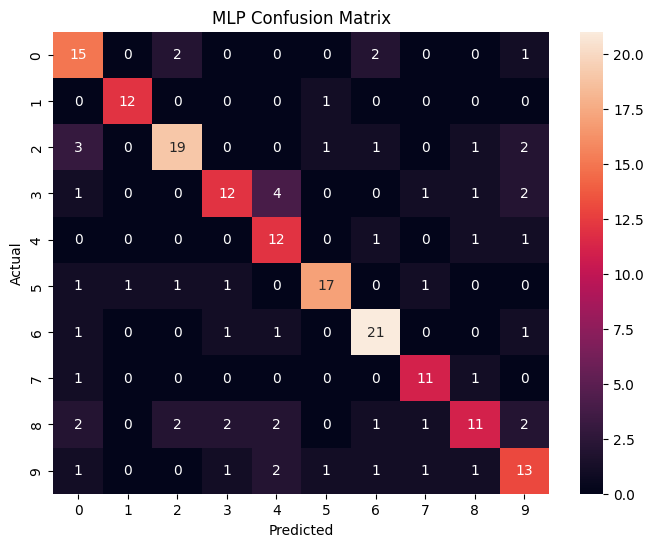

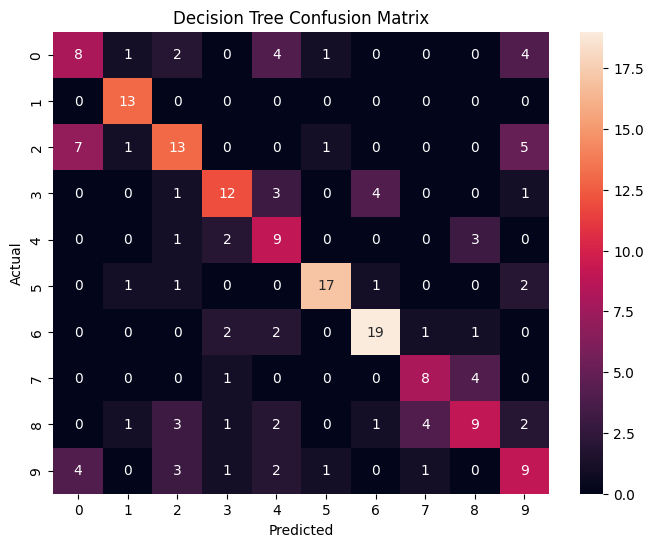

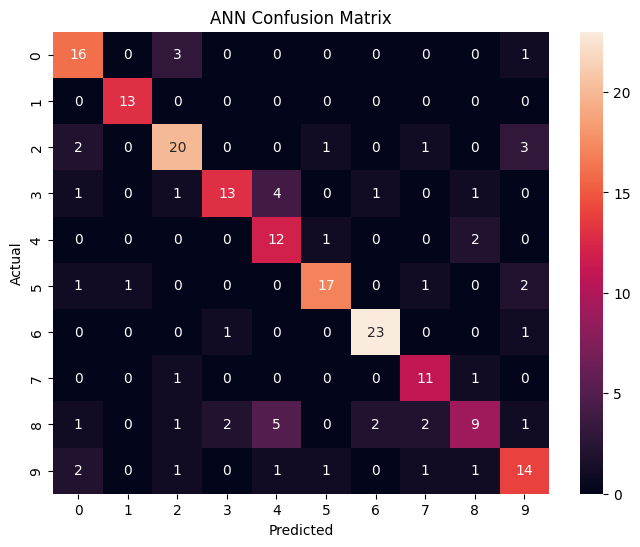

<Figure size 640x480 with 0 Axes>

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.50      0.80      0.62        20
           1       1.00      0.92      0.96        13
           2       0.72      0.67      0.69        27
           3       0.67      0.57      0.62        21
           4       0.59      0.87      0.70        15
           5       0.88      0.68      0.77        22
           6       0.91      0.84      0.87        25
           7       0.85      0.85      0.85        13
           8       0.53      0.43      0.48        23
           9       0.47      0.43      0.45        21

    accuracy                           0.69       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.70      0.69      0.69       200

Classification Report for MLP:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        20
           1       0.92      0.92      0.92        13
           2    

In [ ]:
#function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

#plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm_predictions, 'SVM Confusion Matrix')

#plot confusion matrix for MLP
plot_confusion_matrix(y_test, mlp_predictions, 'MLP Confusion Matrix')

#plot confusion matrix for Decision Tree
plot_confusion_matrix(y_test, dt_predictions, 'Decision Tree Confusion Matrix')

#plot confusion matrix for ANN
plot_confusion_matrix(y_test, ann_predictions, 'ANN Confusion Matrix')

plt.tight_layout()
plt.show()

#classification reports for models
print("Classification Report for SVM:")
print(classification_report(y_test, svm_predictions))

print("Classification Report for MLP:")
print(classification_report(y_test, mlp_predictions))

print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_predictions))

print("Classification Report for ANN:")
print(classification_report(y_test, ann_predictions))


# print("Classification Report for CNN:")
# print(classification_report(y_test, cnn_predictions))


In [ ]:
# ********************************************************************** Task - 2 ****************************************************************
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset from the CSV file
file_path = '/content/NewDatasetTrain.csv'
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File {file_path} not found.")
    exit()

data['label'] = data['label'].str.strip().str.replace('\n', '')

# Extract features and labels
X = data.drop(columns=['label', 'filename'])  # Exclude the label and filename columns
y = data['label']

# Convert labels to categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('clf', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])

# Define hyperparameters for tuning
param_grid = {
    'clf__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'clf__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'clf__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'clf__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'clf__max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for best split
}

# Perform Grid Search Cross Validation for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Test accuracy after tuning: {accuracy * 100:.2f}%")

# Now, for predicting from 'new_input'
new_input_path = '/content/NewDatasetTest.csv'
try:
    new_input_data = pd.read_csv(new_input_path)
except FileNotFoundError:
    print(f"File {new_input_path} not found.")
    exit()

# Extract features and labels from new input data
X_new = new_input_data.drop(columns=['label', 'filename'])  # Exclude the label and filename columns
y_new = new_input_data['label']

# Convert labels to categorical
y_new = label_encoder.transform(y_new)

# Predict the labels for the new unseen data
predictions_new = best_model.predict(X_new)

# Evaluate accuracy on the new unseen data
accuracy_new = accuracy_score(y_new, predictions_new)
print(f"Accuracy on new unseen data: {accuracy_new * 100:.2f}%")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Test accuracy after tuning: 55.50%
Accuracy on new unseen data: 26.00%


In [ ]:
# *************************************** TASK - 1 ************************************************************
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import warnings

# Load the dataset from the CSV file
file_path = '/content/features_30_sec.csv'
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File {file_path} not found.")
    exit()

data['label'] = data['label'].str.strip().str.replace('\n', '')

# Extract features and labels
X = data.drop(columns=['label', 'filename'])  # Exclude the label and filename columns
y = data['label']

# Convert labels to categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets without specifying random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Suppress sklearn warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Initialize and train a Random Forest Classifier without specifying random_state
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test set
predictions = rf_classifier.predict(X_test)

# Evaluate accuracy
accuracy = (predictions == y_test).mean()
print(f"Test accuracy: {accuracy * 100:.2f}%")

# Now, for predicting from 'new_input'
new_input_path = '/content/features_30_sec -2.csv'
try:
    new_input_data = pd.read_csv(new_input_path)
except FileNotFoundError:
    print(f"File {new_input_path} not found.")
    exit()

# Select only numeric columns for imputation
numeric_columns = new_input_data.select_dtypes(include='number').columns
new_input_data_numeric = new_input_data[numeric_columns]

# Fill missing values with mean
imputer = SimpleImputer(strategy='mean')
new_input_data_imputed = pd.DataFrame(imputer.fit_transform(new_input_data_numeric),
                                      columns=new_input_data_numeric.columns)

predicted_genres = []

for idx, new_input_instance in new_input_data_imputed.iterrows():
    new_input_features = new_input_instance.values.reshape(1, -1)  # Reshape for prediction
    predicted_genre = label_encoder.inverse_transform(rf_classifier.predict(new_input_features))
    predicted_genres.append(predicted_genre[0])

print(f"The predicted genres for the new inputs are: {predicted_genres}")


Test accuracy: 77.50%
The predicted genres for the new inputs are: ['blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'hiphop', 'blues', 'rock', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'rock', 'blues', 'country', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'country', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'country', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM
import matplotlib.pyplot as plt

# Load data
features = pd.read_csv("/content/features_30_sec.csv")

# Convert categorical labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
features['label'] = label_encoder.fit_transform(features['label'])

# Select features and target
X = features.drop(columns=['filename', 'label'])
y = features['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier()
}

# Initialize deep learning models
dl_models = {
    "MLP": Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(64, activation='relu'),
        Dense(len(y.unique()), activation='softmax')
    ]),
    "CNN": Sequential([
        Conv1D(64, 3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(len(y.unique()), activation='softmax')
    ]),
    "RNN": Sequential([
        LSTM(64, input_shape=(X_train_scaled.shape[1], 1)),
        Dense(len(y.unique()), activation='softmax')
    ])
}

# Train and evaluate classifiers
results_dl = {}
for name, model in dl_models.items():
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    if name == "CNN" or name == "RNN":
        X_train_scaled_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
        X_test_scaled_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
        model.fit(X_train_scaled_reshaped, y_train, epochs=10, batch_size=64, verbose=0)
        y_pred = np.argmax(model.predict(X_test_scaled_reshaped), axis=-1)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred = np.argmax(y_pred, axis=-1)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results_dl[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Create dataframe of results
results_df_dl = pd.DataFrame.from_dict(results_dl, orient='index')

# Plot results
plt.figure(figsize=(10, 6))
results_df_dl.plot(kind='bar', rot=45)
plt.title('Performance of Deep Learning Algorithms')
plt.ylabel('Score')
plt.xlabel('Algorithm')
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load data
features = pd.read_csv("/content/features_30_sec.csv")

# Select features and target
X = features.drop(columns=['filename', 'label'])
y = features['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
dt_y_pred = dt_classifier.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred, average='weighted')
dt_recall = recall_score(y_test, dt_y_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_y_pred, average='weighted')

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)
rf_y_pred = rf_classifier.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')

# Support Vector Machine Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)
svm_y_pred = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred, average='weighted')
svm_recall = recall_score(y_test, svm_y_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_y_pred, average='weighted')

# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
knn_y_pred = knn_classifier.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred, average='weighted')
knn_recall = recall_score(y_test, knn_y_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_y_pred, average='weighted')

# Multilayer Perceptron Classifier
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train_scaled, y_train)
mlp_y_pred = mlp_classifier.predict(X_test_scaled)
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
mlp_precision = precision_score(y_test, mlp_y_pred, average='weighted')
mlp_recall = recall_score(y_test, mlp_y_pred, average='weighted')
mlp_f1 = f1_score(y_test, mlp_y_pred, average='weighted')

# Create DataFrame of results
results_df = pd.DataFrame({
    "Algorithm": ["Decision Tree", "Random Forest", "SVM", "KNN", "MLP"],
    "Accuracy": [dt_accuracy, rf_accuracy, svm_accuracy, knn_accuracy, mlp_accuracy],
    "Precision": [dt_precision, rf_precision, svm_precision, knn_precision, mlp_precision],
    "Recall": [dt_recall, rf_recall, svm_recall, knn_recall, mlp_recall],
    "F1 Score": [dt_f1, rf_f1, svm_f1, knn_f1, mlp_f1]
})

# Display results
print(results_df)


       Algorithm  Accuracy  Precision  Recall  F1 Score
0  Decision Tree     0.555   0.554811   0.555  0.548855
1  Random Forest     0.760   0.773767   0.760  0.757009
2            SVM     0.700   0.702729   0.700  0.693814
3            KNN     0.645   0.652546   0.645  0.643333
4            MLP     0.725   0.735419   0.725  0.720512


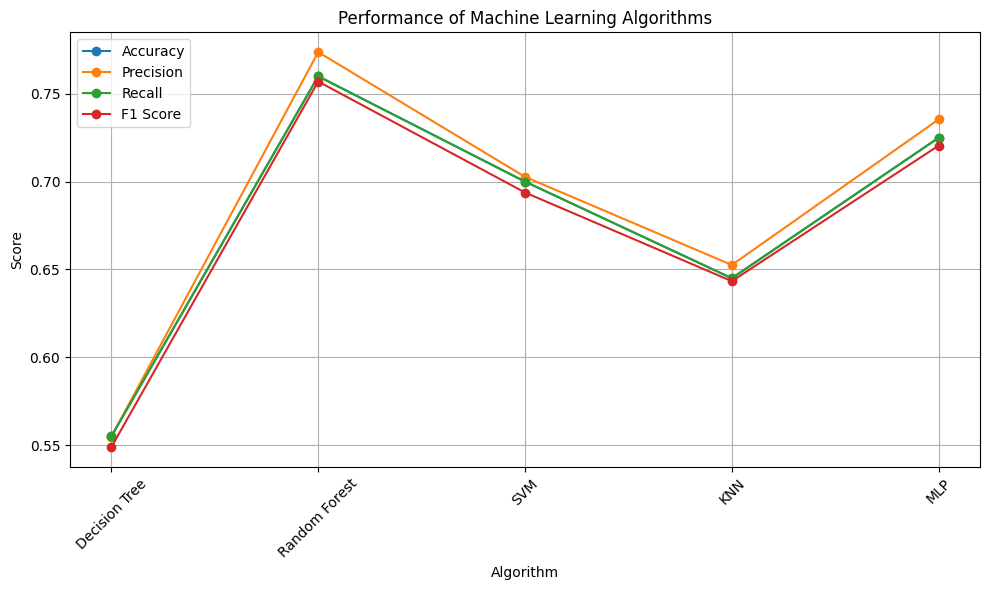

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Plot Accuracy
plt.plot(results_df["Algorithm"], results_df["Accuracy"], marker='o', label='Accuracy')

# Plot Precision
plt.plot(results_df["Algorithm"], results_df["Precision"], marker='o', label='Precision')

# Plot Recall
plt.plot(results_df["Algorithm"], results_df["Recall"], marker='o', label='Recall')

# Plot F1 Score
plt.plot(results_df["Algorithm"], results_df["F1 Score"], marker='o', label='F1 Score')

# Add labels and title
plt.title('Performance of Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Function to extract features from an audio file
def extract_features(file_path):
    # For demonstration, let's assume features are already extracted
    # with the same dimensions as those used during training
    # Replace this with your actual feature extraction method
    num_features = 58  # Assuming the same number of features used during training
    features = np.random.rand(1, num_features)  # Random features for demonstration
    return features


# Load the dataset from the CSV file
# Replace 'NewDatasetTrain.csv' with the filename of your dataset
try:
    data = pd.read_csv('/content/features_30_sec.csv')
except FileNotFoundError:
    print("Dataset file not found.")
    exit()

data['label'] = data['label'].str.strip().str.replace('\n', '')

# Extract features and labels
X = data.drop(columns=['label', 'filename'])  # Exclude the label and filename columns
y = data['label']

# Convert labels to categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('clf', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
predictions = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Test accuracy: {accuracy * 100:.2f}%")

# Save the trained model and preprocessing steps
joblib.dump(pipeline, 'trained_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

# Function to predict the genre of an audio file
def predict_genre(file_path, model, label_encoder):
    # Extract features from the audio file
    features = extract_features(file_path)

    # Predict the genre label
    predicted_label = model.predict(features)

    # Decode the predicted label using label encoder
    predicted_genre = label_encoder.inverse_transform(predicted_label)

    return predicted_genre[0]

# Example usage:
# file_path = "/content/classical.00000.wav"  # Replace with the path to your audio file
model = joblib.load('trained_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')
predicted_genre = predict_genre(file_path, model, label_encoder)
print("Predicted Genre:", predicted_genre)
